# **ANOVA**

## **Problem Statement**

Imagine you just got promoted as the Director of Delivery and Transportation of an E-commerce company. It's the company's pain point that the driver's tend to work overtime since they can't deliver all the parcel's within the 8 hour work schedule. So you've initiated a project that reduces the average time completion of driver's using AI assisted routing. Using ANOVA Check whether the time completion of drivers got faster using AI assisted routes.

### **Dataset**

We'll be using dummy samples that contain 81 - 90 Average Time Completion of Delivery Drivers for a duration of 30 days

### **Hypothesis Testing**

<i>**H0 (Null Hypothesis)**:</i><br>
<i>μ-non_ai_assisted = μ-ai_assisted1 = μ-ai_assisted2</i><br>
<i>**H1 (Alternative Hypothesis):**</i><br>
<i>μ-non_ai_assisted != μ-ai_assisted1</i><br>
<i>μ-non_ai_assisted != μ-ai_assisted2</i><br>
<i>μ-ai_assisted1 != μ-ai_assisted2</i><br>
<i>**F:** F-statistic</i><br>
<i>**MSS:** Mean Sum of Squares</i><br>
<i>**n:** Samples within a group</i><br>
<i>**N:** Total Samples<i>

$$F = \frac{MSS_{between}} {MSS_{within}} $$ <br>
$$MSS_{between} = \frac{n * \sum{(\bar{x_{i}} - \bar{x_{g}})^2}} {Treatment_{groups} - 1}$$ <br>
$$MSS_{within} = \frac{\sum{(x_{ij} - \bar{x_{i}})}^2} {N - Treatment_{groups}}$$




### **Action**

Proceed with a one-way ANOVA, Tukey Test, and η² to see if there's statistical evidence that AI routing solutions reduces the average Time to Complete of the drivers and its effect sizes. Use **α = 0.05**<br>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from scipy.stats import f

In [3]:
time_to_completion = pd.read_excel('datasets/time_to_close.xlsx')

In [4]:
time_to_completion.head()

,Non-AI assisted,Assisted with AI 1,Assisted with AI 2
0,11.436518,10.098106,5.091162
1,8.082365,-1.000000,-1.000000
2,8.207742,7.343251,7.754777
3,7.390547,6.882222,8.939839
4,10.298111,8.741115,6.834329


In [5]:
time_to_completion['Non-AI assisted'].describe()

count    90.000000
mean      9.090160
std       1.378761
min       5.547692
25%       8.053971
50%       9.127362
75%      10.066251
max      12.278363
Name: Non-AI assisted, dtype: float64

<AxesSubplot:>

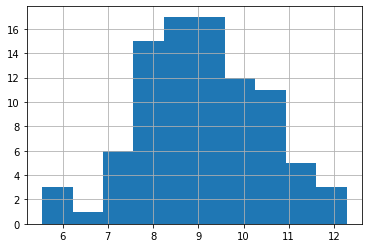

In [6]:
time_to_completion['Non-AI assisted'].hist()

In [7]:
time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                      'Assisted with AI 1'].describe()

count    81.000000
mean      8.126622
std       1.593167
min       3.739034
25%       7.343251
50%       8.076421
75%       9.194465
max      11.833725
Name: Assisted with AI 1, dtype: float64

<AxesSubplot:>

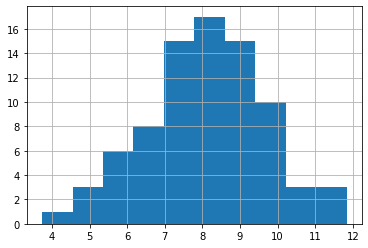

In [8]:
time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                      'Assisted with AI 1'].hist()

In [9]:
time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                      'Assisted with AI 2'].describe()

count    81.000000
mean      7.116559
std       1.531094
min       2.810372
25%       6.120214
50%       7.193652
75%       7.991530
max      10.674053
Name: Assisted with AI 2, dtype: float64

<AxesSubplot:>

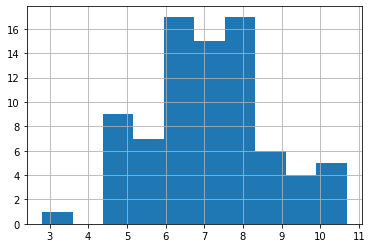

In [10]:
time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                      'Assisted with AI 2'].hist()

In [61]:
# Check the fill rate - no missing values

time_to_completion.notna().mean()

Non-AI assisted       1.0
Assisted with AI 1    1.0
Assisted with AI 2    1.0
dtype: float64

- There are 3 routing solutions: Non-AI assisted, Assisted with AI 1, and Assisted with AI 2
- The samples across the routing solutions are not equal 
    - Non-AI assisted: 90
    - Assisted with AI 1: 81
    - Assisted with AI 2: 81
- The means and the standard deviation across the three routing solutions are almost the same

### **ANOVA Assumptions**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html<br>

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

In [11]:
# Check sample normality - samples are approximately normal

Text(0.5, 1.0, 'Non-AI assisted')

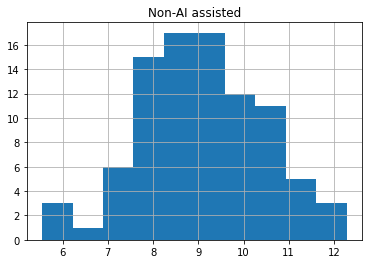

In [12]:
time_to_completion['Non-AI assisted'].hist()
plt.title('Non-AI assisted')

Text(0.5, 1.0, 'Assisted with AI 1')

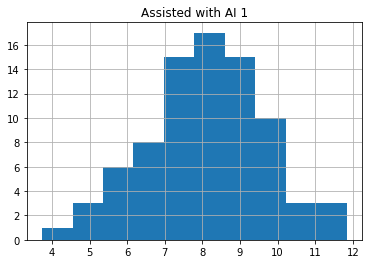

In [13]:
time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                      'Assisted with AI 1'].hist()
plt.title('Assisted with AI 1')

Text(0.5, 1.0, 'Assisted with AI 2')

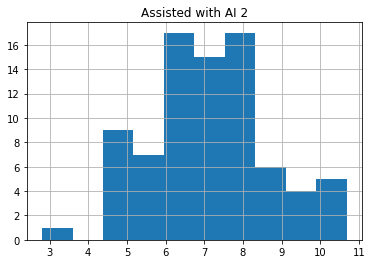

In [14]:
time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                      'Assisted with AI 2'].hist()
plt.title('Assisted with AI 2')

In [17]:
mean_non_ai = np.mean(time_to_completion['Non-AI assisted'].values)

mean_ai1 =  np.mean(time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                  'Assisted with AI 1'].values)
mean_ai2 = np.mean(time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                  'Assisted with AI 2'].values)

group_mean = np.mean([mean_non_ai, mean_ai1, mean_ai2])

ss_between = 90 * ((mean_non_ai - group_mean) ** 2) + \
             81 * ((mean_ai1 - group_mean) ** 2) + \
             81 * ((mean_ai2 - group_mean) ** 2)

ss_within = np.sum((time_to_completion['Non-AI assisted'].values - mean_non_ai) ** 2) + \
            np.sum((time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                  'Assisted with AI 1'].values - mean_ai1) ** 2) + \
            np.sum((time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                  'Assisted with AI 2'].values - mean_ai2) ** 2)

N = 90 + 81 + 81
df1 = 2
df2 = N - 3

MSS_between = ss_between / df1
MSS_within = ss_within / df2

print(f'F-statistic = {MSS_between / MSS_within: .4f}')
print(f'p-value = {1 - f.cdf(MSS_between / MSS_within, df1, df2)}')

F-statistic =  37.0104
p-value = 8.43769498715119e-15


In [19]:
# Check if by-hand F-statistic is the same to the Scipy Implementation

f_results = f_oneway(
    time_to_completion['Non-AI assisted'],
    time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                  'Assisted with AI 1'].values,
    time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                  'Assisted with AI 2'].values    
)

print(f'F-statistic (scipy) = {f_results.statistic: .4f}')
print(f'p-value (scipy) = {f_results.pvalue}')

F-statistic (scipy) =  36.9419
p-value (scipy) = 8.924262286415934e-15


### **Conclusion**

Since the p-value of our F-statistic < 0.05 it suggests that we reject the Null Hypothesis. Which indicates that there statistical evidence that at least one combination amongst our Routing Solutions fairs better or worse than the other solution. We now proceed to find which solution/s reduces our driver's Time to Complete by using effect size tests.

### **Effect Size**

### Tukey / Tukey - Kramer Test

$$Tukey = q . \sqrt{\frac{MSS_{within}} {2} . ({\frac{1} {n_{1}} + {\frac{1} {n_{2}}})}}$$ <br>

### Q-Table for Tukey

https://www2.stat.duke.edu/courses/Spring98/sta110c/qtable.html

In [37]:
# Use α = 0.05

qcrit1 = 2.77 * np.sqrt((MSS_within / 2) * ((1 / 90 ) + (1 / 81)))
qcrit2 = 2.77 * np.sqrt((MSS_within / 2) * ((1 / 90 ) + (1 / 81)))
qcrit3 = 2.77 * np.sqrt((MSS_within / 2) * ((1 / 81 ) + (1 / 81)))

In [38]:
print(qcrit1, qcrit2, qcrit3)

0.44978898489367375 0.44978898489367375 0.46147376150726566


In [40]:
tukey_results = pd.DataFrame({
    'Name': ['Non-AI vs AI1', 'Non-AI vs AI2', 'AI1 vs AI2'],
    'Mean Difference': [mean_non_ai - mean_ai1, mean_non_ai - mean_ai2, mean_ai1 - mean_ai2],
    'Q-Critical': [qcrit1, qcrit2, qcrit3]    
})

tukey_results 

,Name,Mean Difference,Q-Critical
0,Non-AI vs AI1,0.963538,0.449789
1,Non-AI vs AI2,1.973601,0.449789
2,AI1 vs AI2,1.010063,0.461474


### **Conclusion**

Since the Mean Difference across our solutions is greater than their respective critical thresholds - that means drivers using :

AI1's Routing Solution generally finishes their deliveries faster than Non-AI drivers<br>
AI2's Routing Solution generally finishes their deliveries faster than Non-AI drivers<br>
AI2's Routing Solution generally finishes their deliveries faster than AI2 drivers<br>

### η^2

$$η^2 = \frac{MSS_{between}} {MSS_{between} + MSS_{within}} $$ <br>

In [196]:
eta_2 = MSS_between / (MSS_between + MSS_within)
print(f'η^2: {eta_2: .4f}')

η^2:  0.9737


### **Conclusion**

97% of the difference in mean Time to Complete Rates are brought about the different routing solutions